In [1]:
"""
Capstone Project_01 - Sindhu Prasath
================================
Data set - Wine Quality prediction

Target variable - Quality.
Using different features, we are going to predict the quality of wine from the rating 1 to 10 or bad to good.

Stages of the project:
==================
1. Importing libraries
2. Loading dataset
3. Quick analysis
4. EDA - Exploratory Data analysis
5. Missing values handling
6. Scaling
7. Encoding
8. Splitting train and test data
9. Application of Models
10. Evaluation and conclusion

"""

'\nCapstone Project_01 - Sindhu Prasath\n================================\nData set - Wine Quality prediction\n\nTarget variable - Quality.\nUsing different features, we are going to predict the quality of wine from the rating 1 to 10 or bad to good.\n\nStages of the project:\n==================\n1. Importing libraries\n2. Loading dataset\n3. Quick analysis\n4. EDA - Exploratory Data analysis\n5. Missing values handling\n6. Scaling\n7. Encoding\n8. Splitting train and test data\n9. Application of Models\n10. Evaluation and conclusion\n\n'

In [2]:
# Import basic modules
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

import random

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn import tree

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report , accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Loading dataset
wqp = pd.read_csv('QualityPrediction.csv')
wqp.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
"""
Analysis:
Dataset tells about the quality of wine in 1 to 10 rating basis.
Quality of wine is based on the different independent variables, hence the quality is the target/dependent variable
Encoding of Quality variable needs to be done. though it is in numerical form, its the rating of wine quality from 1 to 10.
1 - bad ; 10 - good;
All other variables are in numerical form, hence no encoding is needed.
Based on the EDA, we will get more information about the dataset.
"""

'\nAnalysis:\nDataset tells about the quality of wine in 1 to 10 rating basis.\nQuality of wine is based on the different independent variables, hence the quality is the target/dependent variable\nEncoding of Quality variable needs to be done. though it is in numerical form, its the rating of wine quality from 1 to 10.\n1 - bad ; 10 - good;\nAll other variables are in numerical form, hence no encoding is needed.\nBased on the EDA, we will get more information about the dataset.\n'

In [5]:
wqp.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'] 

wqp.shape

(1599, 12)

In [7]:
# Information about the data columns

wqp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wqp.describe().transpose()
# Descibtion about our data set

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
# EDA - EXPLORATORY DATA ANALYSIS

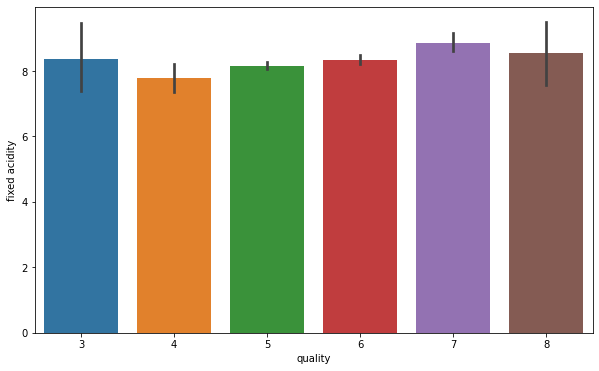

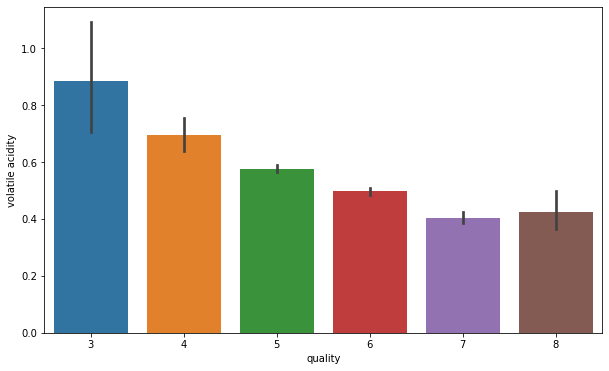

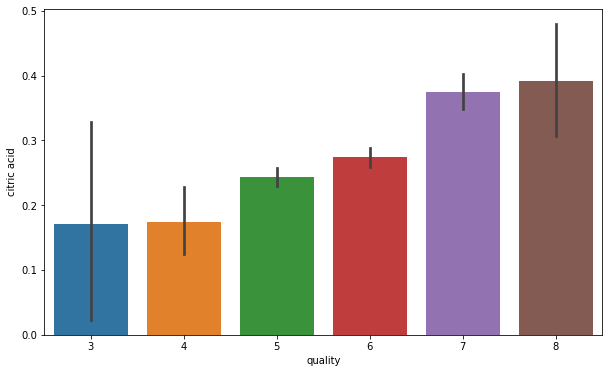

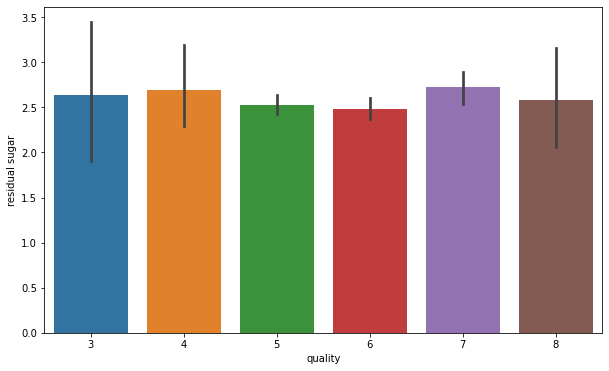

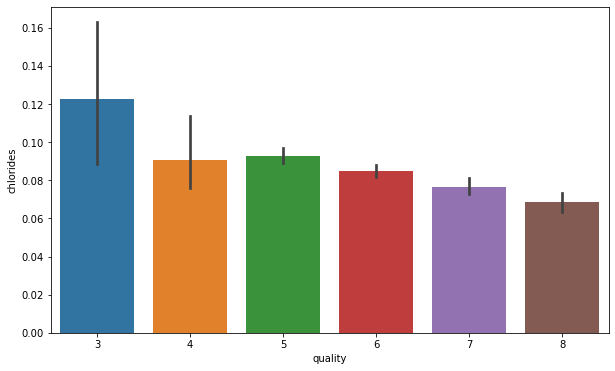

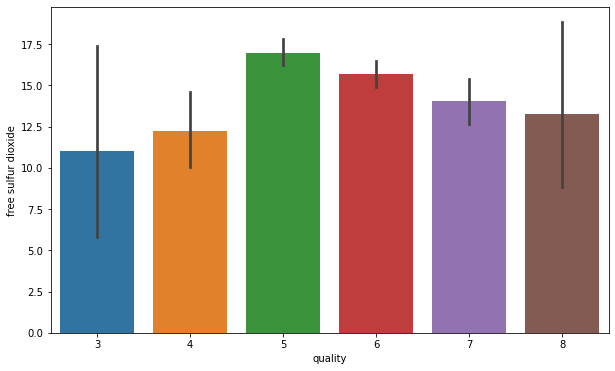

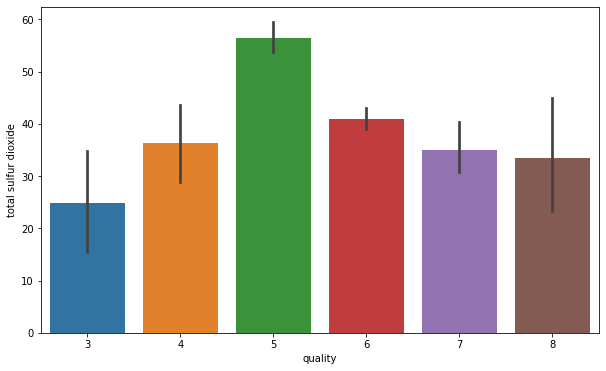

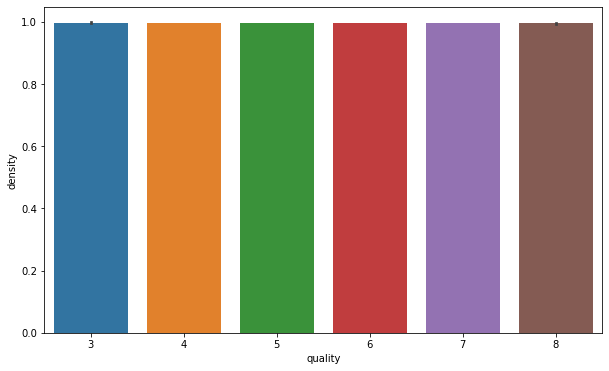

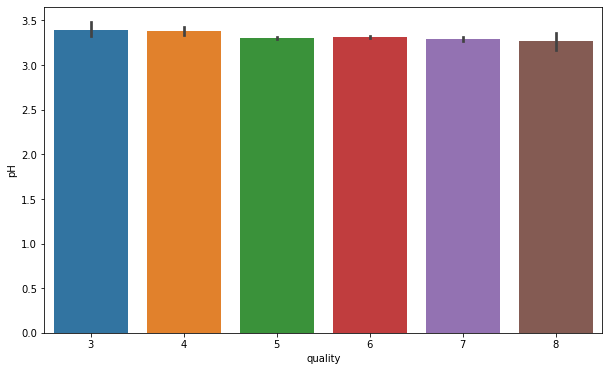

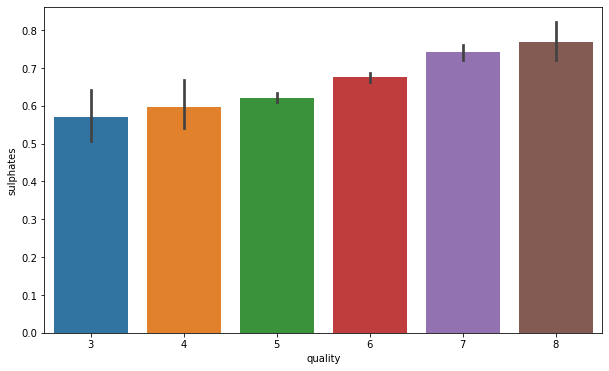

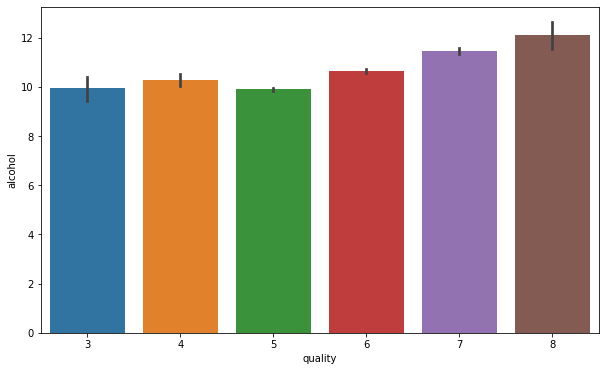

In [10]:
for i in range(len(wqp.columns)-1):
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = wqp[wqp.columns[i]], data = wqp)
    
# Used for loop to run bar chart for all feautres with Quality.

#Observation for features after plotting is as follows:

# Looks like Quality of wine doesnot get affected by fixed acidity.
# Average value is fixed acidity stays same of all types of wines

# Looks like as quality gets better there is a decrese in volatile acidity. 
# May be we can get better quality wine with low volatile acidity value

# Looks like better the quality of wine higher the Citric acid.

# Similar to fixed acidity feature, residual sugar have no impact on quality of wine.
# May be better to drop both values for more accurate prediction.

# Looks like for better quality wine, we are getting lower chlorides value.

# There is some fluctuation in free sulphur dioxide. Cannot able to conclude with graph. 
# Overall, higher the free sulphur dioxide, better the quality.

# Similar to free sulphur dioxide, total sulphur dioxide no linear corelation.
#(Not sure able exact term usage.)

# Density stays same for all quality values

# Slight decrease in pH value as we see increase in Quality of wine.

# Contradicting to the pH value, Sulphates and Alcohol feature increase for good quality wine.


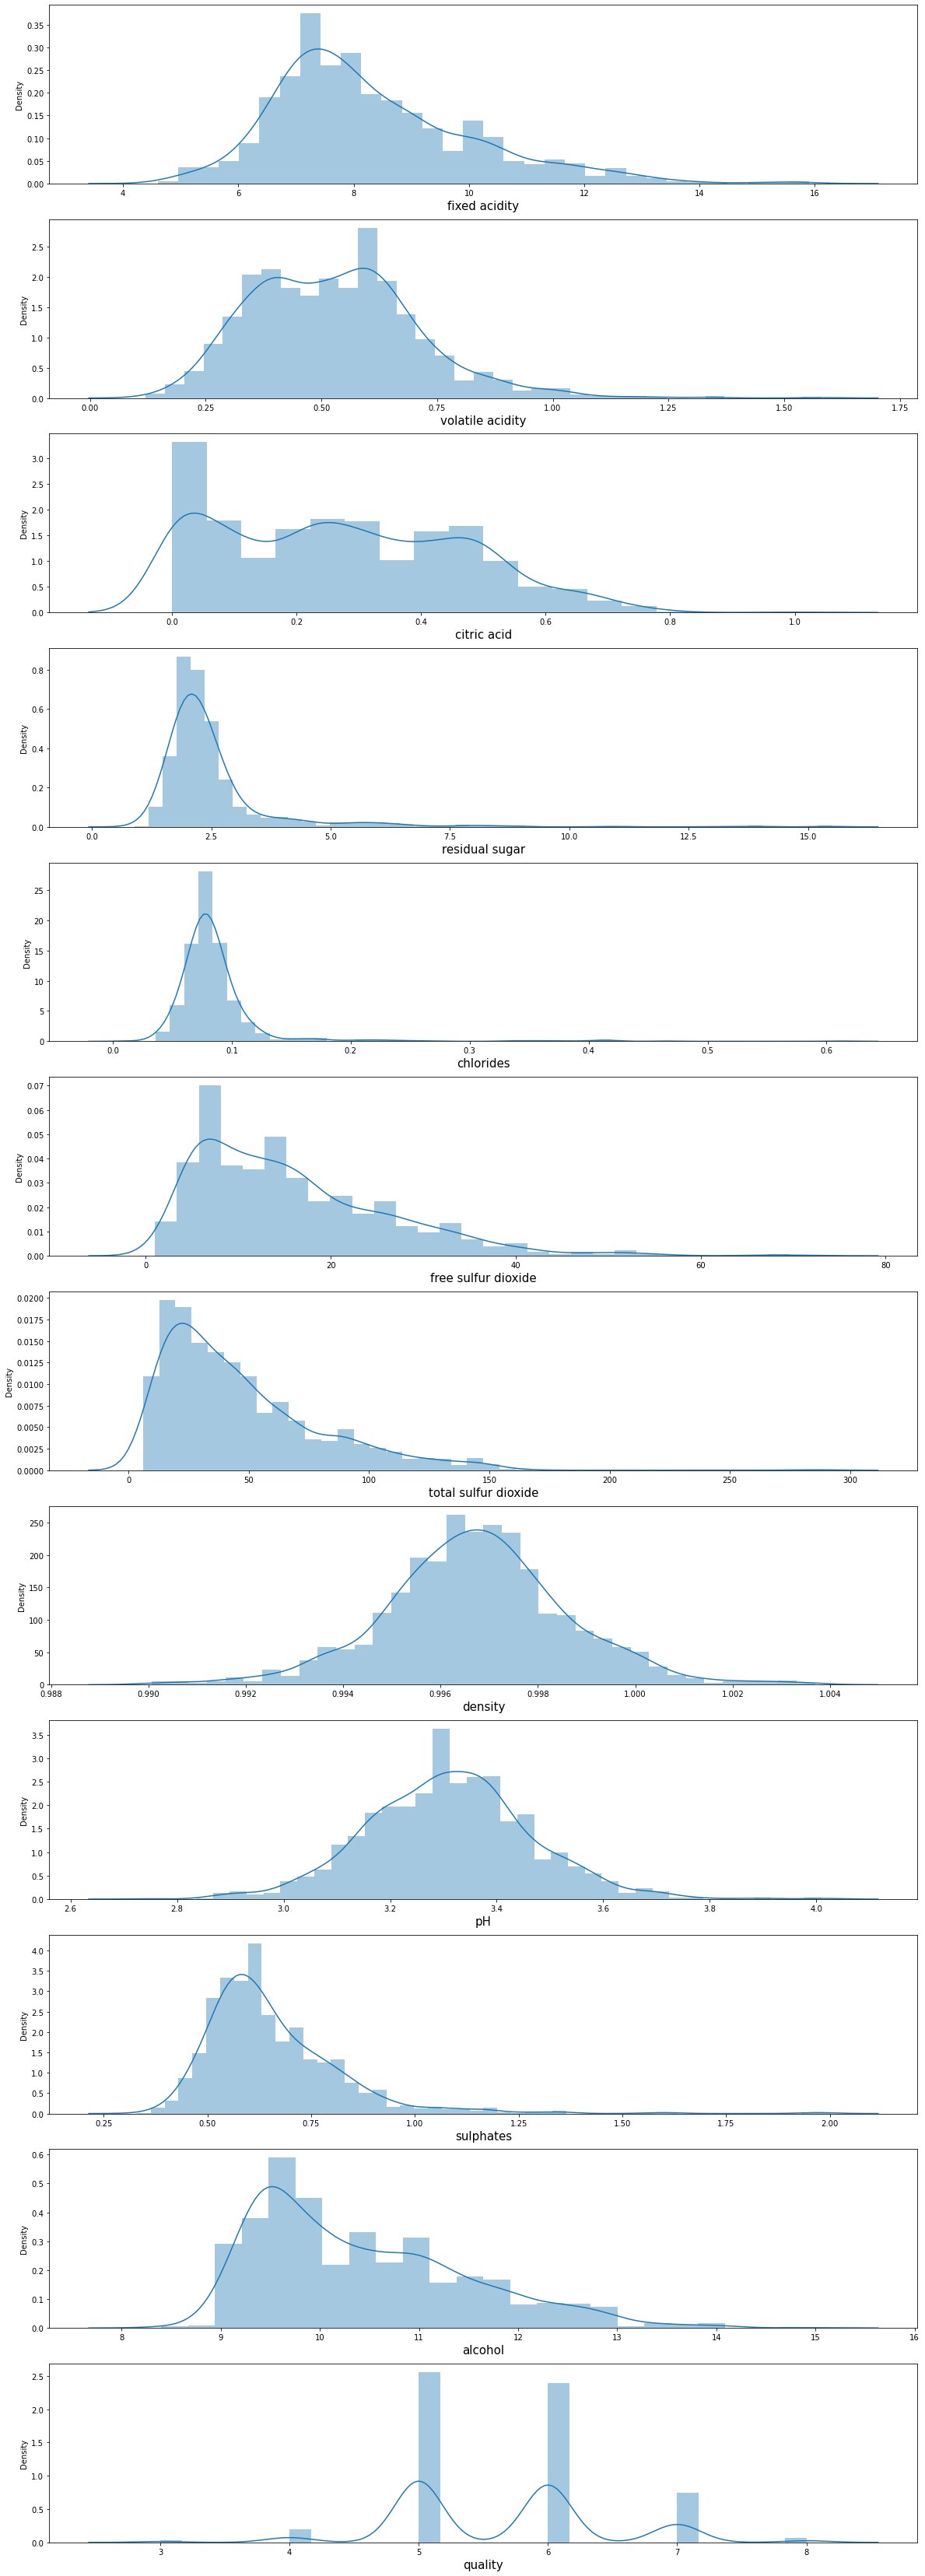

In [11]:
#histogram
# plot
f, axes = plt.subplots(len(wqp.columns), figsize=(20, 60), sharex=False)
for i in range(len(wqp.columns)):
    d = sns.distplot( wqp[wqp.columns[i]], ax=axes[i])
    d.set_xlabel(wqp.columns[i],fontsize=15)
# USed same for loop comment to compare all features with Quality. 
# With histogram we can get better clarity about outliers also. 
# But as advised, we are not going to process outliers since it will affect the structure of dataset.
# We can see the existance outliers in Histogram plots too.
# For the Quality distribution, we have good density got the value 5 , 6. 
# Looks like Very low count of good Quality wines availble in our dataset. 

<AxesSubplot:xlabel='quality', ylabel='count'>

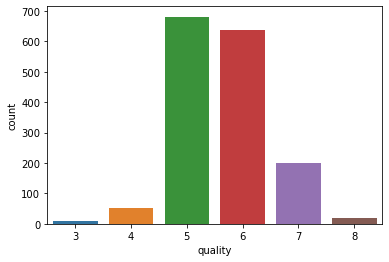

In [12]:
sns.countplot(x='quality', data=wqp)

# The same we can observed using count plot also.
# We have more data for the average quality wines. 
# But in our dataset, I have categorised only good and bad. 
# So planning to split data for less than 6.5 as bad and greater than 6.5 as good.


Text(0.5, 1.0, 'fixed acidity and quality')

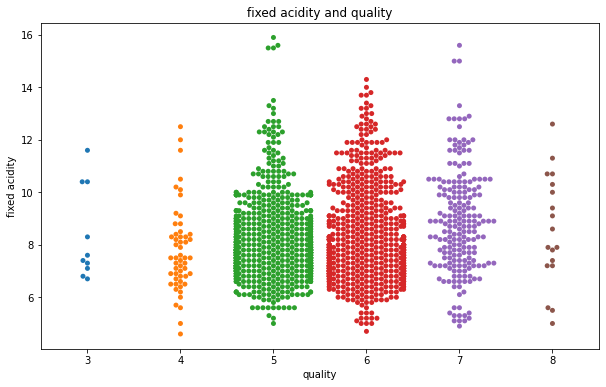

In [13]:
plt.figure(figsize=(10,6))
sns.swarmplot(x= "quality", y="fixed acidity" , data = wqp) 
plt.title('fixed acidity and quality')

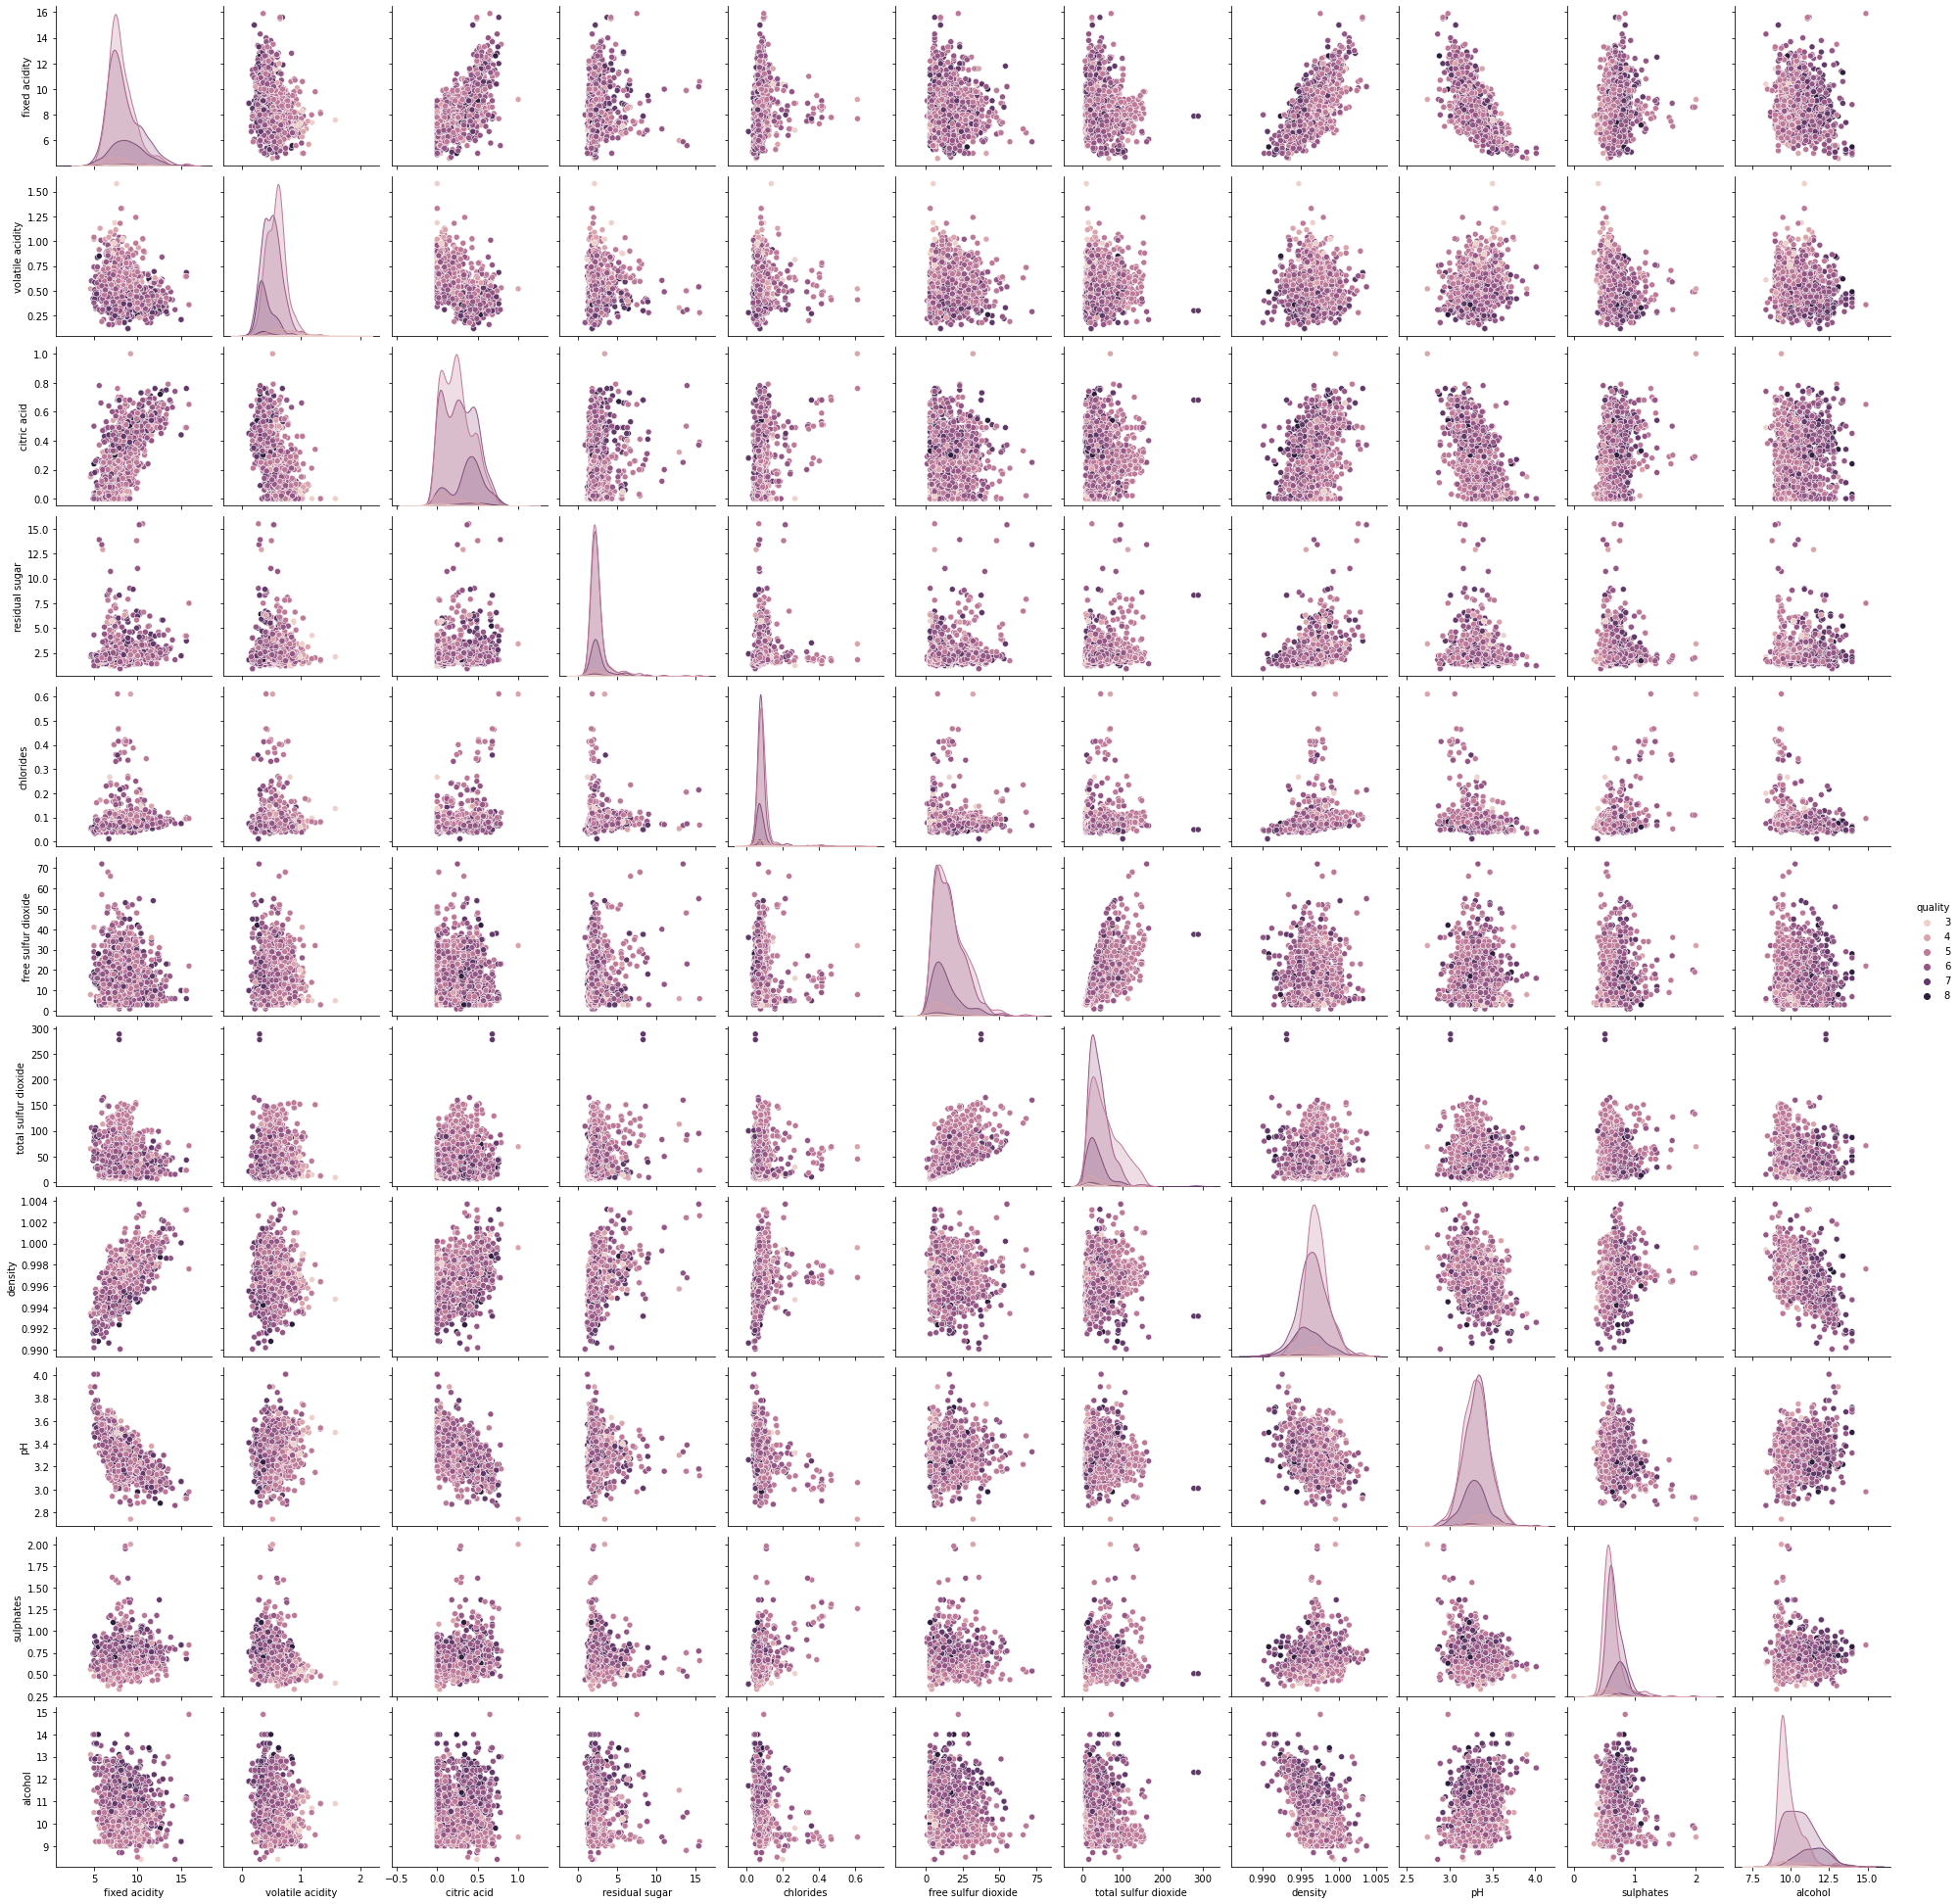

In [14]:
sns.pairplot(wqp, diag_kind = "kde", hue = "quality")

# Pairplot Plots pairwise relationships in a dataset.


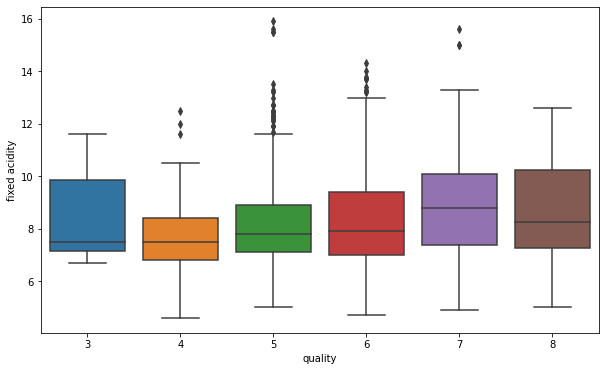

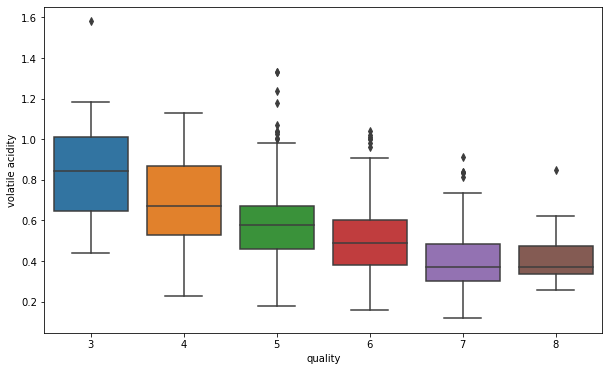

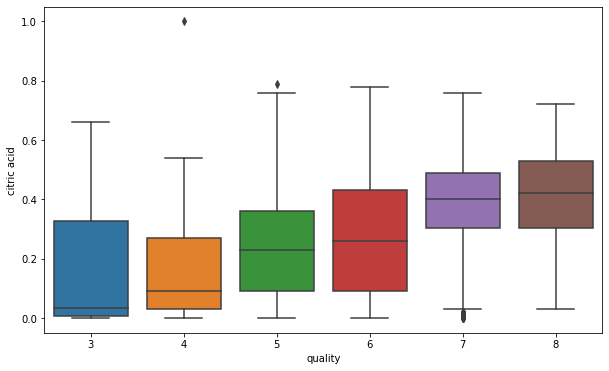

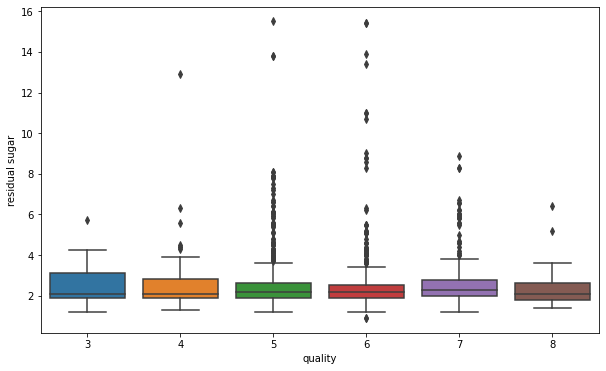

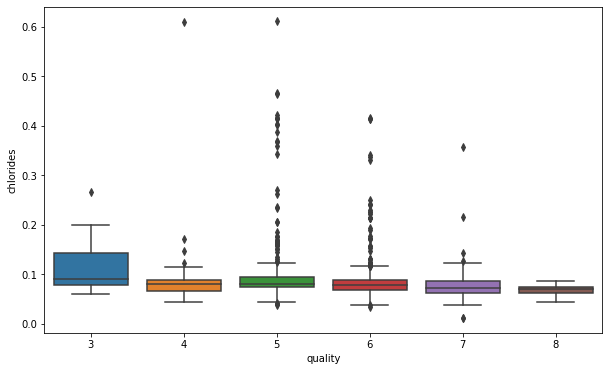

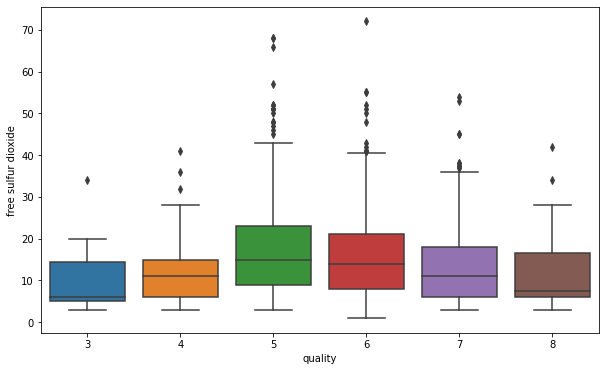

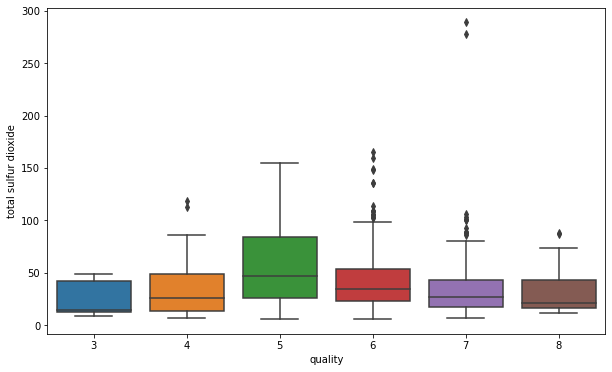

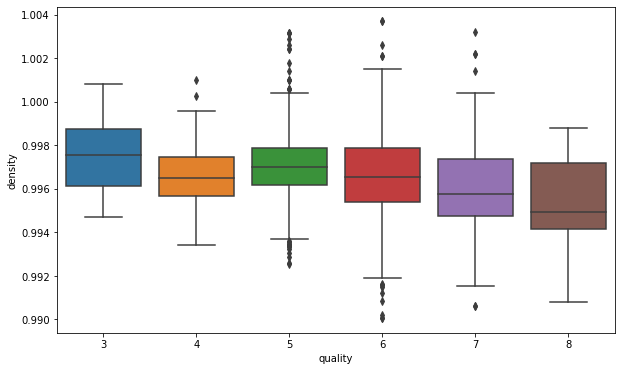

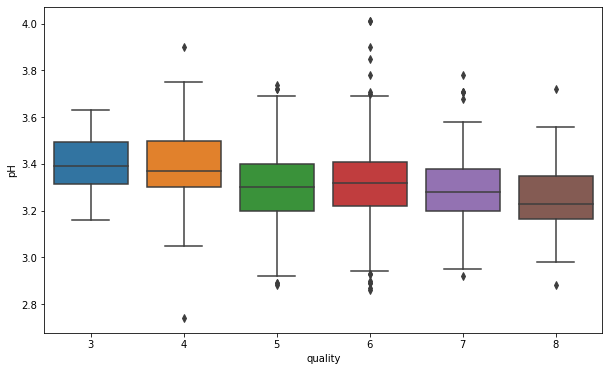

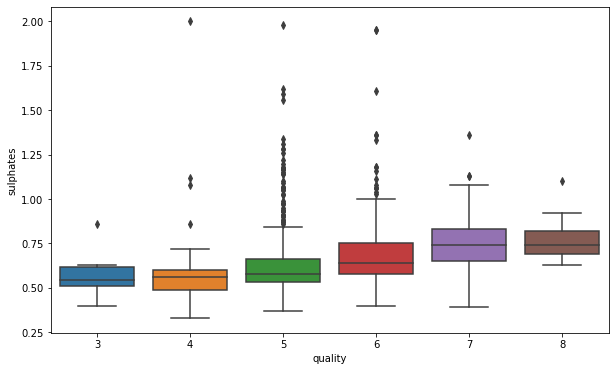

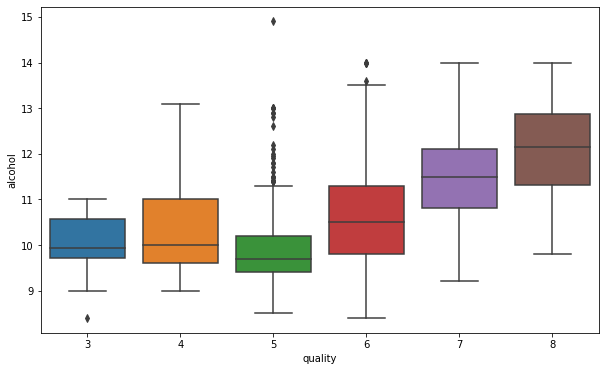

In [15]:
for i in range(len(wqp.columns)-1):
    fig = plt.figure(figsize = (10,6))
    sns.boxplot(x="quality", y=wqp.columns[i],   data=wqp )
    
# Using Bar plot we can have better clarity about outliers.

# Removing the outliers will affect the structure of our dataset.
# Since the requirement is not to affect the structure of our data set,
# we are not going to remove or process outliers


<AxesSubplot:>

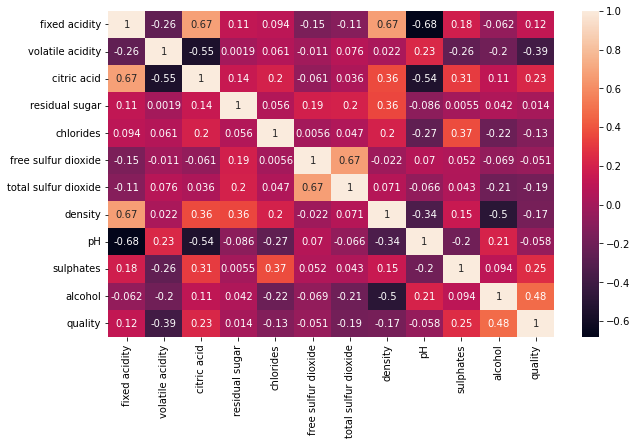

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(wqp.corr(),color = "k", annot=True)

# As predicted in our previous charts, 
# we can see good correlation between fixed acidity and density and citric acid
# And also between free sulfur dioxide and total sulfur dioxide
# Quality and Alcohol - highly correlated.

# Looks like few features are inversely correlated
# Citric acid with pH & fixed acidity with pH & citric acid with volatile acidity

# density with alcohol 

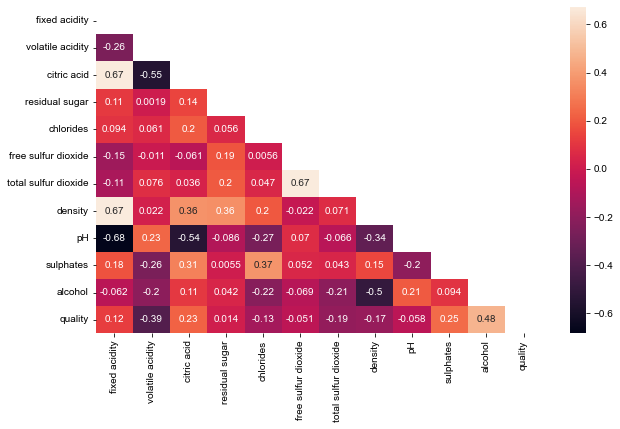

In [17]:
"""
# Above observation can be evaluated with following measures.

Correlation:
P{XY} = corr(X,Y)
1.0 ≤P (XY) ≤+1.0
Where; 0: No relationship
(+/-)0.6: Moderate relationship
(+/-)0.8: Fairly Strong relationship
(+/-)1: Perfect Relationship
Now check the relationship between all the features with the target (Quality)

"""

ZArr = np.zeros_like(wqp.corr()) # creates an array of zeros
UppTri = np.triu_indices_from(ZArr)  
# triu_indices_from -  Return the indices for the upper-triangle of arr.
ZArr[UppTri] = True  # False - display full square heatmap

plt.figure(figsize=(10,6))
sns.heatmap(wqp.corr(), mask=ZArr, annot=True, annot_kws={'size': 10})
sns.set_style('whitegrid')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# As per below plot , we can see pH and fixed acidity are inversely corelated. 
# so as the following features -> critic acid * volatile acidity ; pH * citric acid ; alcohol * density

# critic acid and density are highly correlated to fixed acidity. 
# so as total sulphur dioxide and free sulphur dioxide

In [18]:
#categorize wine quality

bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(wqp['quality'], bins, labels = group_names)
wqp['quality'] = categories

# Encoding our dependent variable: Quality column
# Bad - 0 ; Good - 1

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(wqp['quality'])
y

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
# Splitting Train and Test Data for Model creation

feature_space = wqp.iloc[:, wqp.columns != 'quality']
feature_class = y

x_train, x_test, y_train, y_test = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.30, 
                                                                    random_state = 1)


In [20]:
# Feature Scaling to X_train and X_test to classify better.

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [21]:
"""
Steps for model creation and analysis:
-> Instantiate using Fit comment using train data.
-> Predict the output for test data using x value
-> Check the accuracy of the model.
-> Check confusion matrix
-> Compare with Precision and recall value of each mode.
-> check AUC value after finding ROC curve.

# Above step remains same for all types of model. 
Some models have hyper tuning option to get better accuracy using fine tuning of input parameters

"""

'\nSteps for model creation and analysis:\n-> Instantiate using Fit comment using train data.\n-> Predict the output for test data using x value\n-> Check the accuracy of the model.\n-> Check confusion matrix\n-> Compare with Precision and recall value of each mode.\n-> check AUC value after finding ROC curve.\n\n# Above step remains same for all types of model. \nSome models have hyper tuning option to get better accuracy using fine tuning of input parameters\n\n'

In [22]:

# RANDOM FOREST CLASSIFIER ML MODEL #
# RANDOM FOREST CLASSIFIER WITH HYPER TUNING OF PARAMETERS USING GRID SEARCH CV#



In [23]:
"""
Calculating Accuracy on test data
Training data with x and y training data.
Then predicting output using x test data and
then compare it with already known y test data for accuracy confirmation.
"""

fit_rf = RandomForestClassifier()

fit_rf.fit(x_train,y_train)
x_test_predict = fit_rf.predict(x_test)
test_accuracy = accuracy_score(x_test_predict, y_test)
print('Accuracy on Test Data :',test_accuracy)

# We got 92% Accuracy. 

Accuracy on Test Data : 0.9166666666666666


In [24]:
# Though we got 90% accuracy, Random forest allows us to do hyper tuning using Grid search CV.
"""
Grip search steps are as follows
-> set parameters for the search
-> create model using grid search cv.
-> fit train and test data in our model.
-> using best params attribute get the best parameters for our search

"""
# Grid search for best model and parameters - hypertuning

param_dist = {
              'max_depth': [10,15,20,50],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}


In [25]:
# The best parameters are specified; With each run, there is some change in best parameter results.
# So I have choosen the parameters which gives better accuracy for me.

fit_rf.set_params(criterion = 'gini',
                  max_features = 'sqrt', 
                  bootstrap = False,
                  max_depth = 50)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt')

In [26]:
fit_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt')>

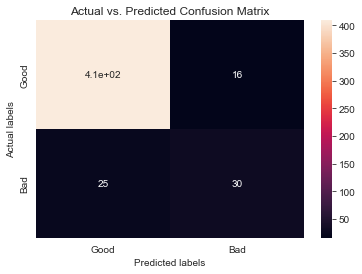

In [27]:
fit_rf.fit(x_train, y_train)
y_pred = fit_rf.predict(x_test)

# Plotting confusion matrix to know about actual and Prediction value
cm=confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm,annot = True, ax = ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Good','Bad']); ax.yaxis.set_ticklabels(['Good','Bad']);

plt.show()


In [28]:
accuracy_rf = accuracy_score(y_test,y_pred)
accuracy_rf

0.9145833333333333

In [29]:
"""
For better accuracy , I tried with few max depths. 
My observation is that, Depending on the option we enter in max depths, 
best param output also differs.
With few trials, I got Accuracy value from 86% to 91%

"""

'\nFor better accuracy , I tried with few max depths. \nMy observation is that, Depending on the option we enter in max depths, \nbest param output also differs.\nWith few trials, I got Accuracy value from 86% to 91%\n\n'

In [30]:
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test,predictions_prob)
print("confusion matrix - Random Forest :",cm)
print("Area under the curve for Random Forest Classification Model : ",auc(fpr,tpr))

# Better the AUC value better the model

# Recall calculation : 
"""
TPR/Recall = TP / (TP+FN)
Precision = TP / (TP+FP)

"""

TPR = 409/(409+16)
print("Recall/TPR for Random Forest :", TPR)
Precision = 409 / (409+26)
print("Precision for Random Forest : ",Precision)
print("Accuracy for Random Forest :",accuracy_rf)

confusion matrix - Random Forest : [[409  16]
 [ 25  30]]
Area under the curve for Random Forest Classification Model :  0.9045347593582888
Recall/TPR for Random Forest : 0.9623529411764706
Precision for Random Forest :  0.9402298850574713
Accuracy for Random Forest : 0.9145833333333333


In [31]:
"""
With the above values, we can understand ur accuracy of the model is 92%
Precision value which is the ratio of True Positive value to the Total Pedicted Positve.
->Proportion of times that when we predict its positive it actually turns out to be positive.
Recall : 
-> It is the proportion of times we labeled positive correctly over the amount of times it was actually positive.

By the above values, we can conclude our model is good.

"""

'\nWith the above values, we can understand ur accuracy of the model is 92%\nPrecision value which is the ratio of True Positive value to the Total Pedicted Positve.\n->Proportion of times that when we predict its positive it actually turns out to be positive.\nRecall : \n-> It is the proportion of times we labeled positive correctly over the amount of times it was actually positive.\n\nBy the above values, we can conclude our model is good.\n\n'

In [32]:
# Random forest with Gradient Decent Classifier
# ============================================#

In [33]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

print("Gradient decent classifier - Classification report:",classification_report(y_test, pred_sgd))

print("GDC - Confusion Matrix : ",confusion_matrix(y_test, pred_sgd))

Gradient decent classifier - Classification report:               precision    recall  f1-score   support

           0       0.90      0.99      0.94       425
           1       0.60      0.11      0.18        55

    accuracy                           0.89       480
   macro avg       0.75      0.55      0.56       480
weighted avg       0.86      0.89      0.85       480

GDC - Confusion Matrix :  [[421   4]
 [ 49   6]]


In [34]:
# Support Vector Classifier

## SVM with Default Hyper-Parameter
#### Usually we use this model for Voice regonition or with huge rows and columns
### ==================================================== #

In [35]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Support Vector Classifier - classification report : ")
print(classification_report(y_test, pred_svc))
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
print("SVC - Confusion Matrix : ",confusion_matrix(y_test, pred_svc))

Support Vector Classifier - classification report : 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       425
           1       0.57      0.31      0.40        55

    accuracy                           0.89       480
   macro avg       0.74      0.64      0.67       480
weighted avg       0.88      0.89      0.88       480

Accuracy Score: 0.9145833333333333
SVC - Confusion Matrix :  [[412  13]
 [ 38  17]]


In [36]:
## Linear Kernal

In [37]:
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8916666666666667


In [38]:
# Polynomial Kernal

In [39]:
svc = SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8854166666666666


In [40]:
## Optimized Parameter from GridSearchCv

In [41]:
tuned_parameter = {'C': [0.1, 1, 10, 100, 1000],        #High C values ensure high accuracy
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],   #Low gamma values ensure high margins
              'kernel': ['linear','rbf','ploy']}

In [42]:
# Its taking so much time to run to this code.

model_svm = GridSearchCV(svc,tuned_parameter,cv=10,scoring='accuracy')

model_svm.fit(x_train,y_train)
print(model_svm.best_score_)

0.9052686615186614


In [43]:
print(model_svm.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [44]:
# when kernel is poly, we also can mention the degree of polynomial we want

svc = SVC(kernel='rbf',C=100,gamma=1)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix :",cnf_matrix)

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print("auc :",auc)

Accuracy Score:
0.90625
Confusion matrix : [[412  13]
 [ 32  23]]
auc : 0.6937967914438503


In [45]:
"""
# LINEAR REGRESSION MODEL #

LINEAR REGRESSION MODEL MAINLY USED FOR PREDICTIONS FOR CONTINUOUS VARIABLES. 
SINCE OUR TARGET VARIABLE IS DISCRETE. 
WE ARE NOT USING THIS MODEL FOR WINE QUALITY PREDICTION.

But instead of rejecting ocmpletely, we are going to apply this model and try out some factors. 

"""

'\n# LINEAR REGRESSION MODEL #\n\nLINEAR REGRESSION MODEL MAINLY USED FOR PREDICTIONS FOR CONTINUOUS VARIABLES. \nSINCE OUR TARGET VARIABLE IS DISCRETE. \nWE ARE NOT USING THIS MODEL FOR WINE QUALITY PREDICTION.\n\nBut instead of rejecting ocmpletely, we are going to apply this model and try out some factors. \n\n'

In [46]:
feature_space = wqp.iloc[:, wqp.columns != 'quality']
feature_class = y

X_train, X_test, y_train, y_test = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.2, 
                                                                    random_state = 10)



In [47]:
# Model Selection — Multivariable Linear Regression

In [48]:
regr = LinearRegression()      # instantiating
regr.fit(X_train, y_train)    # fitting the model, training our model using train data

print('Training data r-squared:', regr.score(X_train, y_train))    # Getting R square value for Train data
print('Test data r-squared:', regr.score(X_test, y_test))          # R square value for our test data

print('Intercept', regr.intercept_)                   # intercept is the constant or the c value in Y = mX + c
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']) # coef_ is the slope value

# From the output, we can see TEst data r square value is higher than train data.

Training data r-squared: 0.22109847794231996
Test data r-squared: 0.30059196948587985
Intercept 40.87516636153558


,coef
fixed acidity,0.041000
volatile acidity,-0.194433
citric acid,0.080150
residual sugar,0.026081
chlorides,-0.577886
free sulfur dioxide,-0.000583
total sulfur dioxide,-0.000793
density,-42.217612
pH,0.079129
sulphates,0.309863


In [49]:
# Model creation using Statsmodels.api

X_incl_const = sm.add_constant(X_train)        
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

,coef,p values
const,40.875166,0.000
fixed acidity,0.041000,0.002
volatile acidity,-0.194433,0.002
citric acid,0.080150,0.304
residual sugar,0.026081,0.001
chlorides,-0.577886,0.006
free sulfur dioxide,-0.000583,0.604
total sulfur dioxide,-0.000793,0.034
density,-42.217612,0.000
pH,0.079129,0.424


In [50]:
print(results.summary())
# Single comment to get all statiscal data regarding ols regression.
# This output is only useful to Statisticians.

# Even from the notes, we can see there is strong multi collinearlity between some features.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     32.70
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           1.63e-61
Time:                        18:57:53   Log-Likelihood:                -263.63
No. Observations:                1279   AIC:                             551.3
Df Residuals:                    1267   BIC:                             613.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.8752 

In [51]:
"""
As evaluated, we can see that an increase in alcohol, fixed acidity, and sulphate 
will improve the quality of the red wine whereas other attributes such as 
chlorides, sulfur dioxide, volatile acidity, pH in large quantities 
will decrease the quality of the red wine.

"""

'\nAs evaluated, we can see that an increase in alcohol, fixed acidity, and sulphate \nwill improve the quality of the red wine whereas other attributes such as \nchlorides, sulfur dioxide, volatile acidity, pH in large quantities \nwill decrease the quality of the red wine.\n\n'

In [52]:
"""
Testing for Multicollinearity:
=============================
Multicollinearity occurs when two or more predictor variables in regression are highly related to one another. 
That is, they do not provide unique information to the model. 
Multicollinearity can be tested using the Variance Inflation Factor (V.I.F)

Using Variance Inflation Factor :
VIF = 1/(1-R^2)
"""

'\nTesting for Multicollinearity:\n=============================\nMulticollinearity occurs when two or more predictor variables in regression are highly related to one another. \nThat is, they do not provide unique information to the model. \nMulticollinearity can be tested using the Variance Inflation Factor (V.I.F)\n\nUsing Variance Inflation Factor :\nVIF = 1/(1-R^2)\n'

In [53]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])] 
# using variane_inflation_factor for all the iteration values from i 
# which is the feature names except the output variable

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

"""
Variance Inflation Factor is a statistical metric used to evaluate multicollinearity in a regression model.

= 1: Not correlated
1–5: Moderately correlated
>5: Highly correlated
>10: is a cause for concern


# From the output, we can see fixed acidity, density is highly correlated.

"""

'\nVariance Inflation Factor is a statistical metric used to evaluate multicollinearity in a regression model.\n\n= 1: Not correlated\n1–5: Moderately correlated\n>5: Highly correlated\n>10: is a cause for concern\n\n\n# From the output, we can see fixed acidity, density is highly correlated.\n\n'

In [54]:
# Using Model Simplification and Bayesian Information Criterion

In [55]:
X_incl_const = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_incl_const) 
results = model.fit() 

org_coef = pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

print('r-squared is', results.rsquared)

r-squared is 0.22109847794231996


In [56]:
X_incl_const = sm.add_constant(X_train) 
X_incl_const = X_incl_const.drop(['fixed acidity', 'residual sugar', 'citric acid', 'free sulfur dioxide'],axis = 1) 
#Dropping the few column

results = sm.OLS(y_train, X_incl_const).fit()

coef_minus_fix_res_cit_free = pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

print('r-square is', results.rsquared)

r-square is 0.20972726609225611


In [57]:
# Normal Distribution — checking for normality

normal_mse = round(results.mse_resid, 3)
normal_rmse = round(np.sqrt(normal_mse))
normal_rsquared = round(results.rsquared, 3)

print("Normal Mean Square Error", normal_mse)
print("Normal Root Mean Square Error", normal_rmse)
print("Normal R-Square", normal_rsquared)


Normal Mean Square Error 0.09
Normal Root Mean Square Error 0
Normal R-Square 0.21


In [58]:
"""
After performing the multivariate regression analysis, our conclusion was that
With p-values - Not all the columns are significant variables.

r-squared of 0.21 and is a poor fit for the model.
That is the data point was far away from the fitted regression line.

The value was not improved even when we removed some features after performing the V.I.F.
In totality, this shows that using the Regression model is not a good model for this type of dataset.
"""

'\nAfter performing the multivariate regression analysis, our conclusion was that\nWith p-values - Not all the columns are significant variables.\n\nr-squared of 0.21 and is a poor fit for the model.\nThat is the data point was far away from the fitted regression line.\n\nThe value was not improved even when we removed some features after performing the V.I.F.\nIn totality, this shows that using the Regression model is not a good model for this type of dataset.\n'

In [59]:
# Overfitting: When training data has higher R square and testing data has very small R square
# Underfitting: When training data has low R square value and testing data also has low R square    
# Ideally: Training dataset must have R square slightly higher than test dataset R square value

In [60]:
"""
# LOGISTIC REGRESSION #
=======================
DESCRIPTION ABOUT MODEL:
* Logistic regression is a classification algorithm
* Target variable is categorical. 
* Since our data set comes under Good Bad category analysis. 
* We are proceding with Logistic regression

Steps for the algorithm:
===================
Similar to random forest, the steps from data loading to train test splitting is same for logistics regression too
So we are moving to model application.

"""


'\n# LOGISTIC REGRESSION #\n=======================\nDESCRIPTION ABOUT MODEL:\n* Logistic regression is a classification algorithm\n* Target variable is categorical. \n* Since our data set comes under Good Bad category analysis. \n* We are proceding with Logistic regression\n\nSteps for the algorithm:\n===================\nSimilar to random forest, the steps from data loading to train test splitting is same for logistics regression too\nSo we are moving to model application.\n\n'

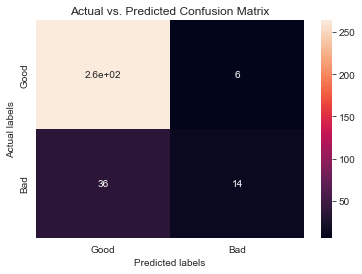

Accuracy value for LR model:  0.86875
Precision value for LR model:  0.7
Recall value for LR model:  0.28
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       270
           1       0.70      0.28      0.40        50

    accuracy                           0.87       320
   macro avg       0.79      0.63      0.66       320
weighted avg       0.85      0.87      0.84       320



In [61]:
##### Instantiating and fitting the model to training Dataset

log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train,y_train)

# Atter training, predicting y value using x test
y_pred = log_reg.predict(X_test)

# the confusion matrix shows the same format everytime: 
# (TN , FP, FN , TP) 
# with actuals being the rows and predicted being the columns

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix 

# sns.heatmap(conf_matrix, annot = True)


ax= plt.subplot()
sns.heatmap(conf_matrix,annot=True, ax= ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Good','Bad']); ax.yaxis.set_ticklabels(['Good','Bad']);

plt.show()

print("Accuracy value for LR model: ", metrics.accuracy_score(y_test,y_pred))   #  (TP + TN )/ Total Prediction  
print("Precision value for LR model: ", metrics.precision_score(y_test,y_pred))    #(TP / Total predicted positive)
print("Recall value for LR model: ", metrics.recall_score(y_test,y_pred))      #(TP / Total actual positves)
print(metrics.classification_report(y_test,y_pred))



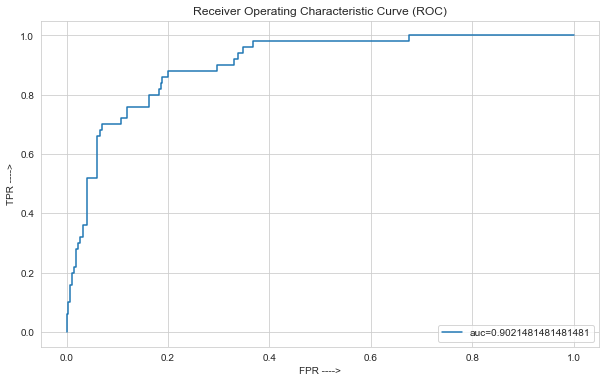

Area under the curve value for LR Model : 0.9021481481481481


In [62]:
# Predict_proba returns the probability of 0 and 1, since we slice [::,1] 
# this implies we only take the probability of 1

y_pred_proba = log_reg.predict_proba(X_test)[::,1]    

# metrics.roc_curve returns three outputs: fpr, tpr and different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

# metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotting the AUC curve
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

auc_lr = metrics.roc_auc_score(y_test, y_pred_proba)     #returns the single auc value
print("Area under the curve value for LR Model :",auc_lr)

In [63]:
""" 
Comparison between Logistic Regression and Random Forest Classification :

AUC:
LR = 0.887
RF = 0.953
-> We have higher auc value for RF model compared to LR.

Accuracy:
LR = 0.865
RF = 0.926
--> Accuracy also we got better result for RF than LR

Precision:
LR = 0.590
RF = 0.967
--> Precision, is the ratio of total positive value  to the predicted positive. 

Recall:
LR = 0.276
RF = 0.946
--> Recall, is the ratio of total positive to the actual positive.
Since Recall is the very important component for model creation. 
We can conclude Random forest is the best fit comparing to Logistic algorithm. 

"""

' \nComparison between Logistic Regression and Random Forest Classification :\n\nAUC:\nLR = 0.887\nRF = 0.953\n-> We have higher auc value for RF model compared to LR.\n\nAccuracy:\nLR = 0.865\nRF = 0.926\n--> Accuracy also we got better result for RF than LR\n\nPrecision:\nLR = 0.590\nRF = 0.967\n--> Precision, is the ratio of total positive value  to the predicted positive. \n\nRecall:\nLR = 0.276\nRF = 0.946\n--> Recall, is the ratio of total positive to the actual positive.\nSince Recall is the very important component for model creation. \nWe can conclude Random forest is the best fit comparing to Logistic algorithm. \n\n'

In [64]:
"""
# DECISION TREE CLASSIFIER #
============================

Decision Tree is a classification and regression supervised ML model. 
It is best suited for a classification problem.

Since our data set is classification based, we are going to explore this model also.

We have already finished our EDA, handling missing values, Encoding, scaling, splitting
we are straight going to model application.

"""

'\n# DECISION TREE CLASSIFIER #\n============================\n\nDecision Tree is a classification and regression supervised ML model. \nIt is best suited for a classification problem.\n\nSince our data set is classification based, we are going to explore this model also.\n\nWe have already finished our EDA, handling missing values, Encoding, scaling, splitting\nwe are straight going to model application.\n\n'

In [65]:
# Build Decision Tree Model

In [66]:
# Decision Tree with Cart(Gini)

In [67]:
# Decision Tree with depth 4 #
# ========================== #

In [68]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(X_train,y_train)

y_pred_4 = model_dt_4.predict(X_test)
accuracy_score_4 = accuracy_score(y_test,y_pred_4)
print('Accuracy Score for model with depth 4 is: ',accuracy_score_4)

Accuracy Score for model with depth 4 is:  0.85625


In [69]:
# Decision Tree with depth 6 #
# ========================== #

In [70]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt_6.fit(X_train,y_train)

y_pred_6 = model_dt_6.predict(X_test)
accuracy_score_6 = accuracy_score(y_test,y_pred_6)
print('Accuracy Score for model with depth 6 is: ',accuracy_score_6)

Accuracy Score for model with depth 6 is:  0.84375


In [71]:
# Decision Tree with depth 8 #
# ========================== #

In [72]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt_8.fit(X_train,y_train)

y_pred_8 = model_dt_8.predict(X_test)
accuracy_score_8 = accuracy_score(y_test,y_pred_8)
print('Accuracy Score for model with depth 8 is: ',accuracy_score_8)

Accuracy Score for model with depth 8 is:  0.859375


In [73]:
# Decision Tree with c4.5(entropy)

In [74]:
model_dt_ent = DecisionTreeClassifier(max_depth=4,criterion='entropy')
model_dt_ent.fit(X_train,y_train)

y_pred_ent = model_dt_ent.predict(X_test)

accuracy_score_4 = accuracy_score(y_test,y_pred_ent)
print('Accuracy Score for model with depth 4 is: ',accuracy_score_4)

Accuracy Score for model with depth 4 is:  0.85


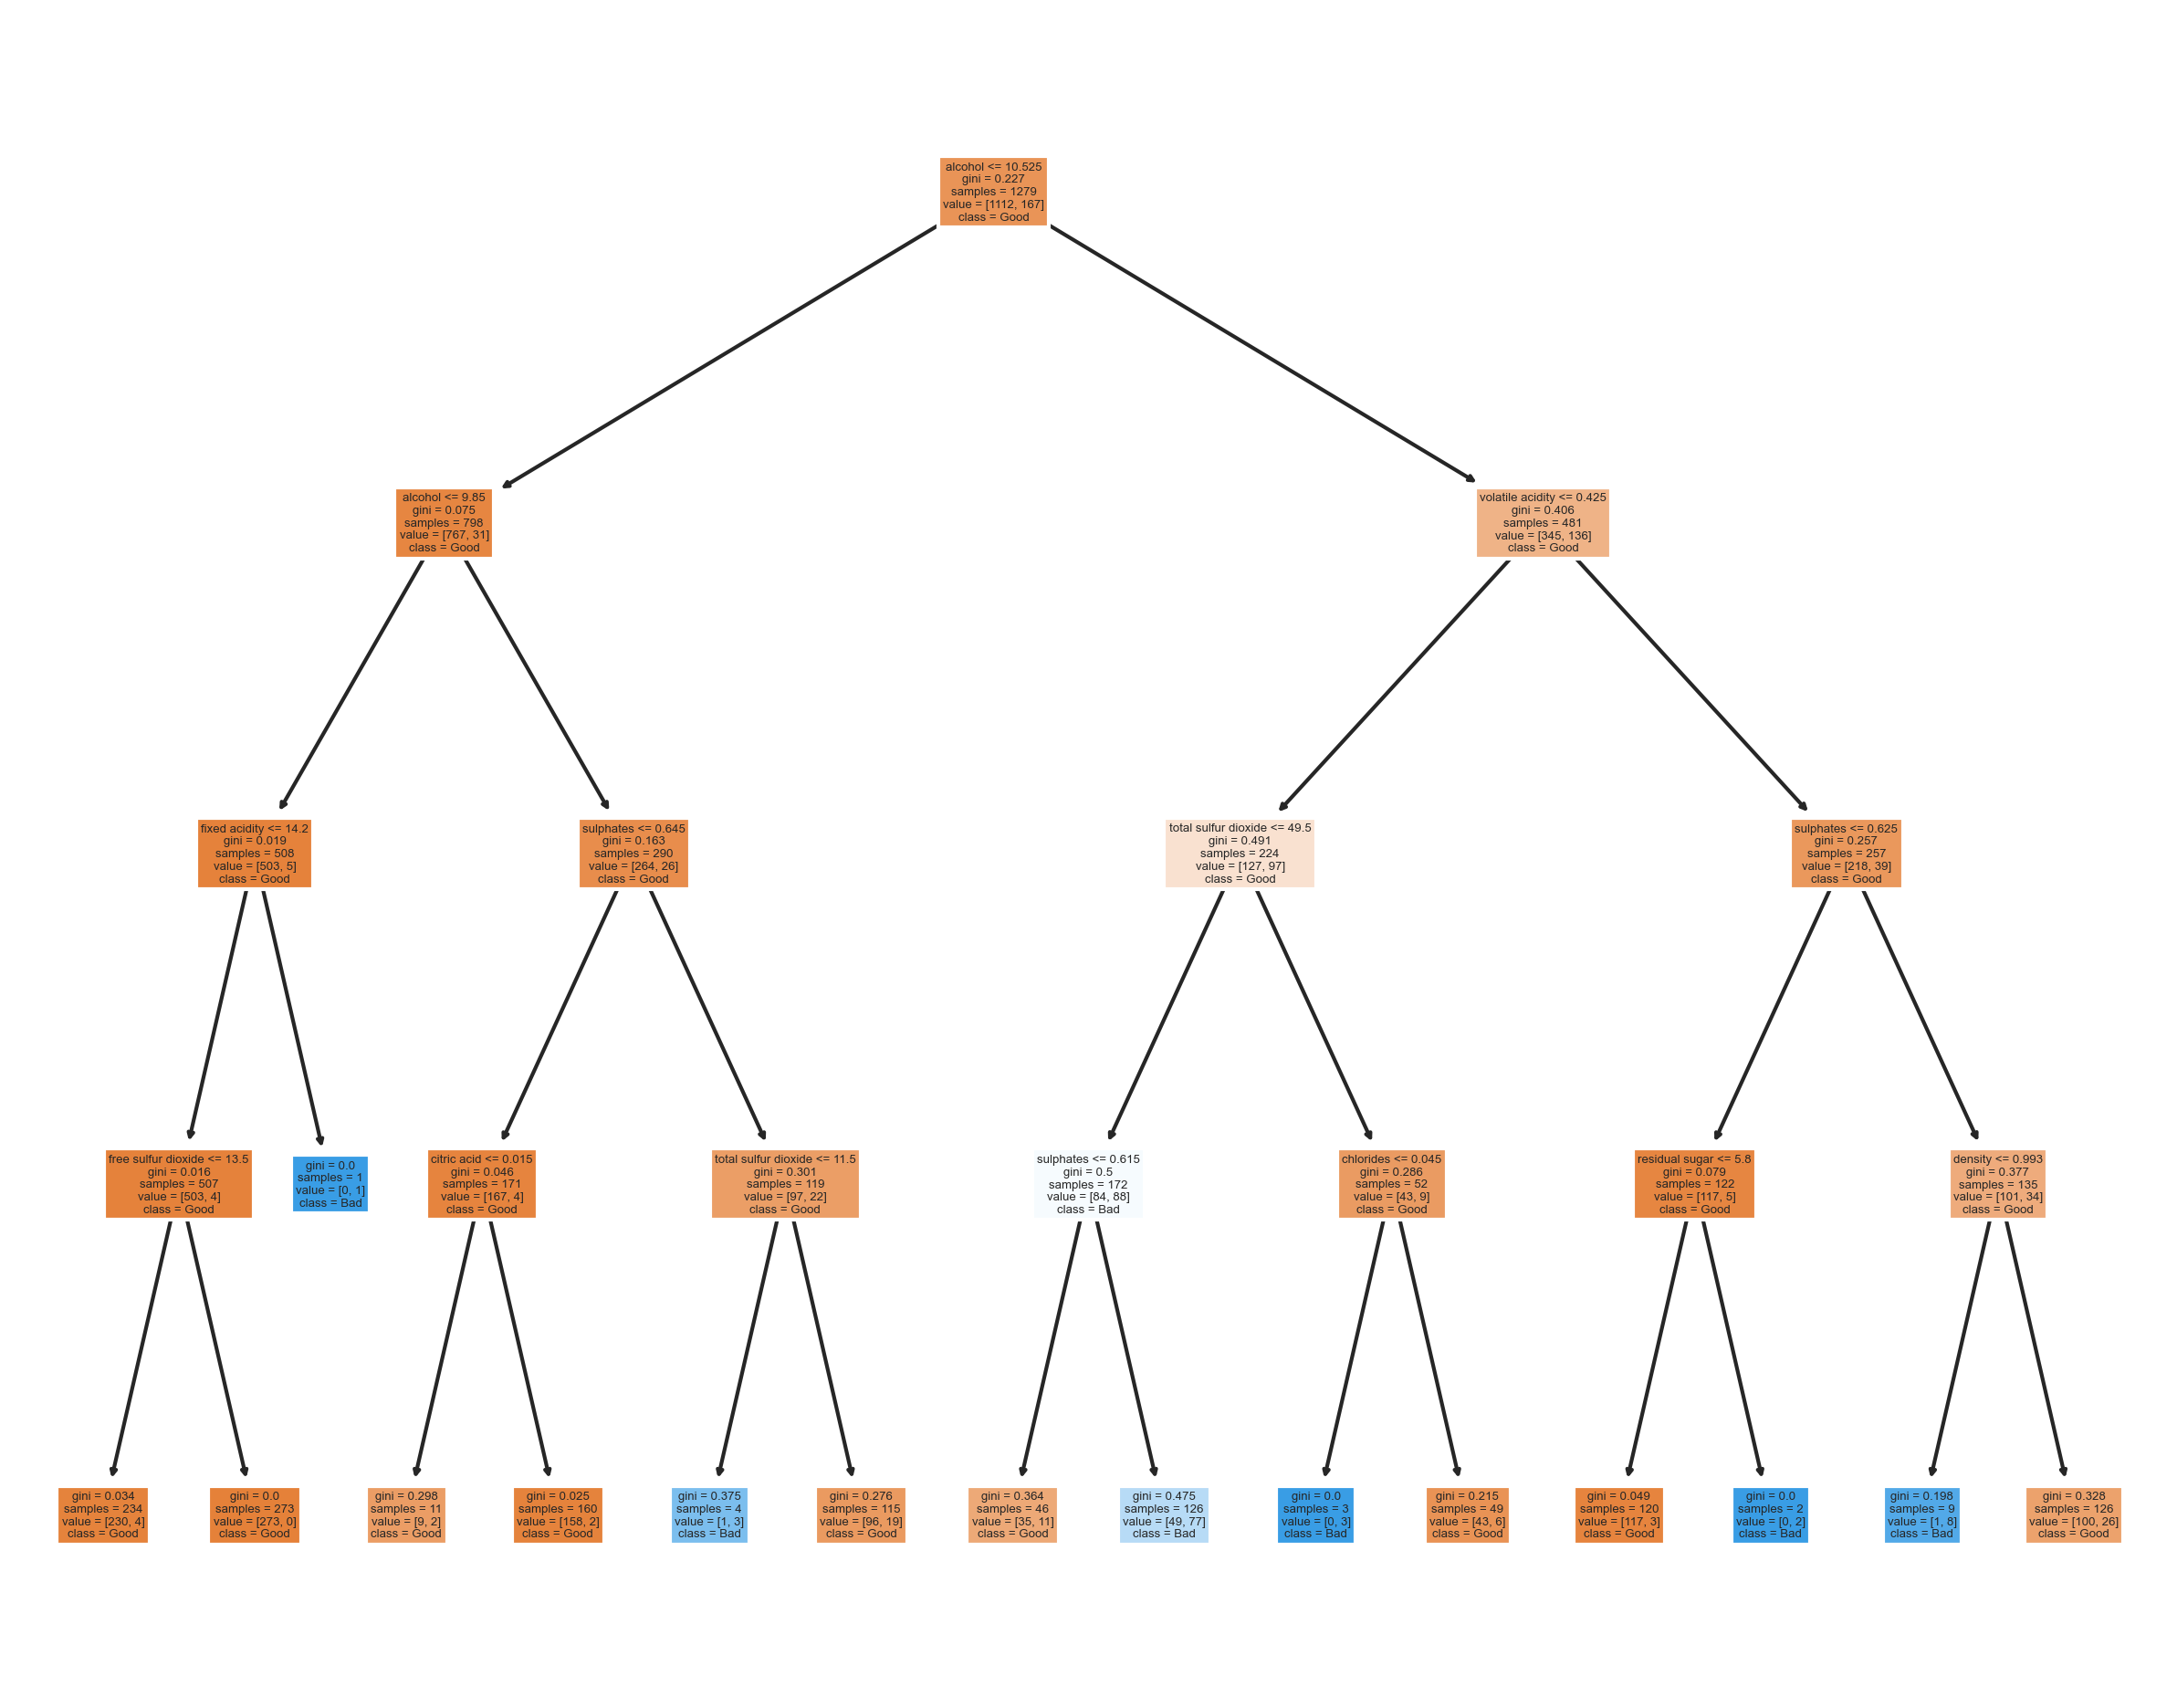

In [75]:
## Graphical Representation of Tree

df1=pd.DataFrame(wqp.drop(['quality'],axis=1))
column_names=list(df1.columns)
fn=column_names
cn=['Good','Bad']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(model_dt_4,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTree.png')

In [76]:
## Confusion Matrix

[[250  20]
 [ 30  20]]


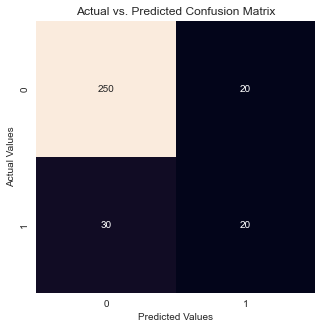

Classification report :                precision    recall  f1-score   support

           0       0.89      0.93      0.91       270
           1       0.50      0.40      0.44        50

    accuracy                           0.84       320
   macro avg       0.70      0.66      0.68       320
weighted avg       0.83      0.84      0.84       320



In [77]:
print(confusion_matrix(y_test,y_pred_6))
# Confusion matrix looks almost similar to Random forest


plt.figure(figsize=(5,5))
conf_mat = confusion_matrix(y_test, y_pred_6)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()


# Classification Report

print("Classification report : ",classification_report(y_test,y_pred_6))
#Since we have more data for bad quality wine, we have found better precision ,recall and f1 score.

In [78]:
## Area Under the Curve

In [79]:
fpr_dt,tpr_dt,_= roc_curve(y_test,y_pred_6)
roc_auc_dt = metrics.auc(fpr_dt,tpr_dt)
print(accuracy_score(y_test,y_pred_6))
# We got good accuracy rate too. But comparatively RF models seems to be better than Decision Tree.

0.84375


In [80]:
results_series = {"actual":y_test, "predicted":y_pred}
results = pd.DataFrame(results_series)
results.head(10)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,1,0
7,0,0
8,0,0
9,0,0


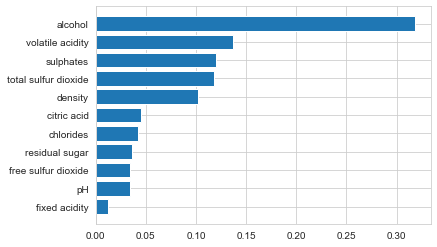

In [81]:
s = {'col1':feature_space.columns, 'col2':model_dt_6.feature_importances_}

df = pd.DataFrame(s)
df_sorted = df.sort_values('col2')
plt.barh(df_sorted["col1"], df_sorted["col2"])
plt.show()

In [82]:
"""
Used Feature Importance on Model Decision Tree with Max Depth = 6 
to understand which features are helping us to create better quality wine
-> Looks like Alcohol content is the main feature for good quality wine.
-> Critric acid, PH and density  feature, 
doesnot help to create much better quality wine.

"""

'\nUsed Feature Importance on Model Decision Tree with Max Depth = 6 \nto understand which features are helping us to create better quality wine\n-> Looks like Alcohol content is the main feature for good quality wine.\n-> Critric acid, PH and density  feature, \ndoesnot help to create much better quality wine.\n\n'

In [83]:
"""
# K Nearest Neighbors with Cross Validation
# KNN Model with Cross Validation

"""

'\n# K Nearest Neighbors with Cross Validation\n# KNN Model with Cross Validation\n\n'

In [84]:
"""
Model -> As every other model initial steps for KNN model stays same.
Since KNN model is distance based model, scaing is must.
And since we need all our data frame in array format,
we are going to redo the part from scaling

"""

'\nModel -> As every other model initial steps for KNN model stays same.\nSince KNN model is distance based model, scaing is must.\nAnd since we need all our data frame in array format,\nwe are going to redo the part from scaling\n\n'

In [85]:
wqp_knn = pd.read_csv('QualityPrediction.csv')
wqp_knn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
# Encoding our dependent variable:Quality column

bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(wqp_knn['quality'], bins, labels = group_names)
wqp_knn['quality'] = categories


labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(wqp_knn['quality'])
y

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wqp_knn.drop('quality',axis=1))
scaled_features

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [88]:
# All the features are scaled, and obtained as an array, it is important to convert it to a DataFrame again
# df.columns[:-1] means all but last column, it is same as df.column[0:10]

df_feat = pd.DataFrame(scaled_features,columns=wqp_knn.columns[:len(wqp_knn.columns)-1])     
df_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [89]:
# Splitting Train and Test Data

X_train, X_test, y_train, y_test = train_test_split(df_feat,y,
                                                    test_size=0.30 , random_state = 1)

knn = KNeighborsClassifier(n_neighbors=3)    #Instantiate
knn.fit(X_train,y_train)                     #fit
pred = knn.predict(X_test)                   #Predict

In [90]:
"""
# Predictions and Evaluations #
===============================

"""

'\n# Predictions and Evaluations #\n===============================\n\n'

In [91]:
print("Confusion Matrix : ",confusion_matrix(y_test,pred))
print(" Classification report beore fine tuning : ")
print(classification_report(y_test,pred))

#Finally finding the AUROC Curve

pred_prob_knn_bht = knn.predict_proba(X_test)[::, 1]

fpr2, tpr2,_ = roc_curve(y_test,pred_prob_knn_bht)

print("Area under the curve before fine tuning : ", metrics.auc(fpr2,tpr2))


Confusion Matrix :  [[393  32]
 [ 28  27]]
 Classification report beore fine tuning : 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       425
           1       0.46      0.49      0.47        55

    accuracy                           0.88       480
   macro avg       0.70      0.71      0.70       480
weighted avg       0.88      0.88      0.88       480

Area under the curve before fine tuning :  0.8147379679144384


In [92]:
## Choosing a K Value

In [93]:
accuracy_rate = []
for i in range(1,40):   
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,y,cv=10)
    accuracy_rate.append(score.mean())
    
# For different number of neighbors the model is run several times using FOR loop
# cross_val_score returns the accuracy score of all the 10 validations done since cv = 10
# In the Accuracy list the mean of all 10 scores is stored.

# Hence we have the mean accuracy score for each iteration.

Text(0, 0.5, 'Accuracy Rate')

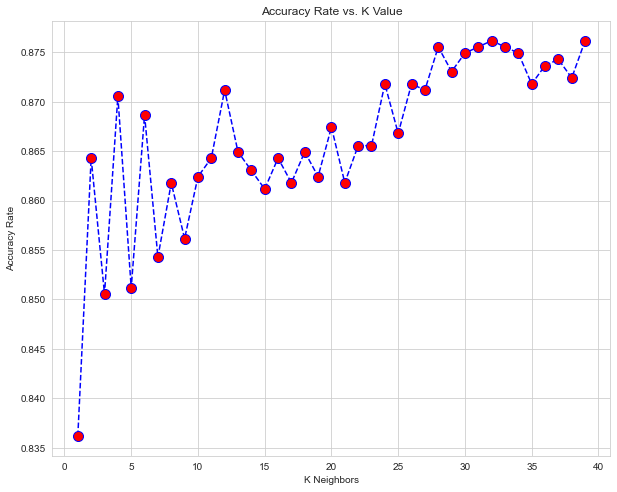

In [94]:
#Plotting the mean accuracy score against all the K values

plt.figure(figsize = (10,8))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Rate')

In [95]:
#Finally using the optimum value of K = 31

knn = KNeighborsClassifier(n_neighbors=31)    #Instantiate
knn.fit(X_train,y_train)                     #fit
pred = knn.predict(X_test)                   #Predict

print("Confusion matrix after fine tuning : ",confusion_matrix(y_test,pred))
print("Classification REport after fie tuning : ")
print(classification_report(y_test,pred))

#Finally finding the AUROC Curve

pred_prob_knn = knn.predict_proba(X_test)[::, 1]

fpr2, tpr2,_ = roc_curve(y_test,pred_prob_knn)

print("Area under the curve after fine tuning : ", metrics.auc(fpr2,tpr2))

Confusion matrix after fine tuning :  [[406  19]
 [ 37  18]]
Classification REport after fie tuning : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       425
           1       0.49      0.33      0.39        55

    accuracy                           0.88       480
   macro avg       0.70      0.64      0.66       480
weighted avg       0.87      0.88      0.87       480

Area under the curve after fine tuning :  0.8343529411764706


In [96]:
"""
# Comparison between two outputs:
Confusion Matrix before fine tuning:  
[[384  29]
[ 34  33]]
 Classification report before fine tuning : 
 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       413
           1       0.53      0.49      0.51        67

    accuracy                           0.87       480
   macro avg       0.73      0.71      0.72       480
weighted avg       0.86      0.87      0.87       480

Area under the curve before fine tuning :  0.8244371363521377


# The accuracy and area under the curve are almost in same range, we can conclude our model is of best fix.
____________________________________

Confusion matrix after fine tuning : 
[[396  17]
 [ 50  17]]
 
Classification Report after fie tuning : 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       413
           1       0.50      0.25      0.34        67

    accuracy                           0.86       480
   macro avg       0.69      0.61      0.63       480
weighted avg       0.83      0.86      0.84       480

Area under the curve after fine tuning :  0.8447472082685845

#We can see slight decrease in accuracy. but slight increase in area under the curve. But either way we can conclude our model is of best fit.
"""

'\n# Comparison between two outputs:\nConfusion Matrix before fine tuning:  \n[[384  29]\n[ 34  33]]\n Classification report before fine tuning : \n \n              precision    recall  f1-score   support\n\n           0       0.92      0.93      0.92       413\n           1       0.53      0.49      0.51        67\n\n    accuracy                           0.87       480\n   macro avg       0.73      0.71      0.72       480\nweighted avg       0.86      0.87      0.87       480\n\nArea under the curve before fine tuning :  0.8244371363521377\n\n\n# The accuracy and area under the curve are almost in same range, we can conclude our model is of best fix.\n____________________________________\n\nConfusion matrix after fine tuning : \n[[396  17]\n [ 50  17]]\n \nClassification Report after fie tuning : \n              precision    recall  f1-score   support\n\n           0       0.89      0.96      0.92       413\n           1       0.50      0.25      0.34        67\n\n    accuracy      

In [97]:
# Naive Bayes Algorithm
# ================== #

In [98]:
# Intantiate the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(X_train,y_train)

GaussianNB()

Multiclass Confusion Matrix [[360  65]
 [ 20  35]]


[]

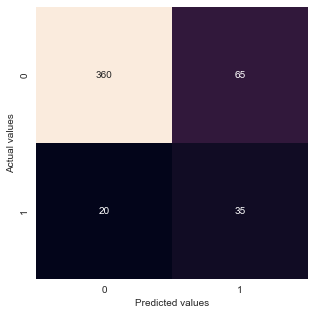

In [99]:
# Predict Output 
pred = model.predict(X_test)
mat = confusion_matrix(y_test, pred)       
print("Multiclass Confusion Matrix",mat)

# Plot Confusion Matrix
plt.figure(figsize=(5,5))
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.plot()

In [100]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       380
           1       0.64      0.35      0.45       100

    accuracy                           0.82       480
   macro avg       0.74      0.65      0.67       480
weighted avg       0.80      0.82      0.80       480



In [101]:
"""
Conclusion : 

Data set - Wine quality prediction

Model used:

Random forest
Random forest Grid cv search
Random forest - gradient decent 
Support vector classifier - Hyper tuning of parameters
Linear regression
Logistic regression
Decision Tree
Decision with Hyper tuning 
KNN regression
Naive bayes Algorithm

With all models, for our dataset we can conclude Ramdom forest with hyper tuning seems to be best fit.
Features like Critic acid can be dropped for better accuracy.

"""


'\nConclusion : \n\nData set - Wine quality prediction\n\nModel used:\n\nRandom forest\nRandom forest Grid cv search\nRandom forest - gradient decent \nSupport vector classifier - Hyper tuning of parameters\nLinear regression\nLogistic regression\nDecision Tree\nDecision with Hyper tuning \nKNN regression\nNaive bayes Algorithm\n\nWith all models, for our dataset we can conclude Ramdom forest with hyper tuning seems to be best fit.\nFeatures like Critic acid can be dropped for better accuracy.\n\n'